# Random Number Generation
## Data Analytics Notebook W1

*Julyver Tolentino* | *Mapua University* | *DS22L*

### Brief Details on Random Numbers in Python

Python `random` library introduces the application of Random Number Generation, specifically PRNG (Pseudo-Random Number Generation). This library is eventually used by more popular Data Science libraries such as `numpy` and `pandas`.

In this notebook, we would be using the `numpy` random number generation using `np.random`. Take note that there is a vast number of features and functionality `numpy` has to offer, and it is highly recommended to read documentations when using Python libraries.

For `numpy` the documentation would be: https://numpy.org/doc/stable/reference/routines.html

In [1]:
import numpy as np

Another alternative to the link is to use the `help()` function and input the name of the module or the function as an argument. It would show the documentation in as its output.

Examples:

In [3]:
help(np.random.seed)

Help on built-in function seed in module numpy.random.mtrand:

seed(...)
    seed(seed=None)
    
    Reseed the singleton RandomState instance.
    
    Notes
    -----
    This is a convenience, legacy function that exists to support
    older code that uses the singleton RandomState. Best practice
    is to use a dedicated ``Generator`` instance rather than
    the random variate generation methods exposed directly in
    the random module.
    
    See Also
    --------
    numpy.random.Generator



In [5]:
help(np.random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    .. note::
        New code should use the `~numpy.random.Generator.uniform`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than or equal to high

### Seeds

Random number generators have an initialized state when importing the given library. However, if we choose to specify an initial state in the event that we want to reproduce the results (as a consequence of outputting the same random numbers), a seed would be passed.

In [7]:
np.random.seed(9453)

In [9]:
np.random.uniform(size=5)

array([0.69854235, 0.3924984 , 0.67912646, 0.68830712, 0.25215612])

Inputting the same seed would yield the same results.

In [14]:
np.random.seed(9453)

In [16]:
np.random.uniform(size=5)

array([0.69854235, 0.3924984 , 0.67912646, 0.68830712, 0.25215612])

In [18]:
np.random.seed(6639)

In [20]:
np.random.uniform(size=5)

array([0.38261128, 0.73313571, 0.89476862, 0.81982919, 0.64044863])

### Generator Types

There are several types of generators that `numpy` can use. The differences and use cases for each generator are bound to the specific and edge cases however, the nature of generating some sense of randomness is applied to most of the random generators that is given.

Types of applicable generators:
- `PCG64()`
- `PCG64DXSM()`
- `MT19937()`
- `Philox()`
- `SFC64()`

Details for each generator found in: https://numpy.org/doc/stable/reference/random/bit_generators/index.html

In [23]:
# Global generator used by numpy
np.random.default_rng()

Generator(PCG64) at 0x7F5919D7C4A0

In [25]:
new_generator = np.random.default_rng(np.random.Philox())
new_generator

Generator(Philox) at 0x7F5919D7C580

In [27]:
new_generator.random(size=5)

array([0.52166817, 0.10179893, 0.18465011, 0.40866538, 0.12993079])

In [29]:
another_generator = np.random.default_rng(np.random.PCG64DXSM())
another_generator

Generator(PCG64DXSM) at 0x7F5919D7CE40

In [31]:
another_generator.random(size=5)

array([0.24861372, 0.13731212, 0.60570204, 0.13595878, 0.57065875])

### Generating Random Numbers

`numpy` offers pre-made functions to generate random numbers from a given distribution, whether discrete or continuous. Here are some of the functions used. More distributions can be seen from the `numpy.random` documentation.

https://numpy.org/doc/stable/reference/random/legacy.html

In [33]:
# For visualizing distributions
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
list_to_choose = [5,6,8]

choose_results = np.random.choice(list_to_choose, size=10)
choose_results

array([8, 8, 8, 6, 6, 8, 8, 8, 6, 5])

Text(0.5, 1.0, 'Countplot of `np.random.choice`')

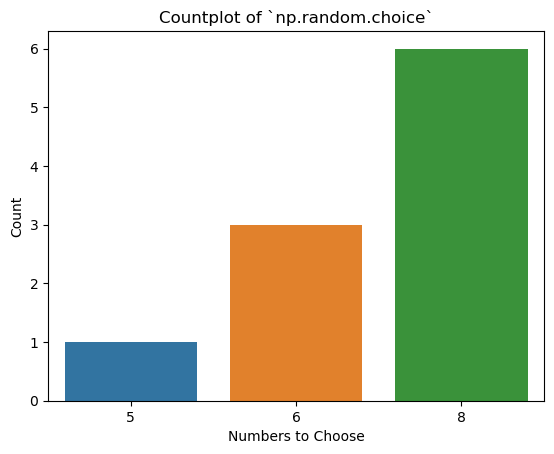

In [37]:
fig, ax = plt.subplots()
sns.countplot(x=choose_results, ax=ax)

ax.set_xlabel('Numbers to Choose')
ax.set_ylabel('Count')
ax.set_title('Countplot of `np.random.choice`')

In [39]:
mu = 2
sigma = 3

normal_values = np.random.normal(loc=mu, scale=sigma, size=120)
normal_values[:10]

array([ 1.9413414 , -0.34730922,  3.771044  ,  8.26144172,  6.75390726,
        1.93852465, -3.46488223, -0.14650796, -2.22264157, -1.50634499])

Text(0.5, 1.0, 'Example Histogram of Random Normal Numbers')

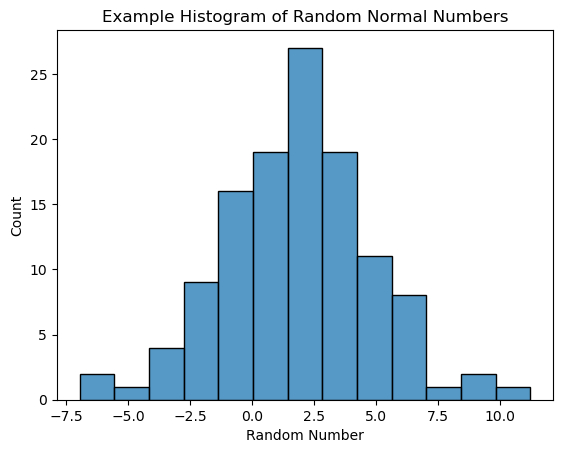

In [41]:
fig, ax = plt.subplots()
sns.histplot(x=normal_values, ax=ax)

ax.set_xlabel('Random Number')
ax.set_ylabel('Count')
ax.set_title('Example Histogram of Random Normal Numbers')

In [43]:
np.random.uniform(low=8, high=10, size=5)

array([8.4108523 , 8.94895941, 9.86811437, 8.04154391, 9.07000193])

In [45]:
# Uses the Philox Generator in the previous chapter
new_generator.uniform(size=5)

array([0.23689951, 0.39637597, 0.39067787, 0.52277751, 0.54160147])

### Creating Custom Distributions

There might be cases that a specific distribution is needed in a given task but it is not available in `numpy.random` module. In this scenario, we would utilize the "Inverse Transform Method" from `np.random.uniform` random numbers to achieve the distribution that we desire.

For example: We wanted to get a distribution from the function:

<h2>$$f(x)=3x^2$$</h2>

Text(0.5, 1.0, '$f(x)=3x^2$')

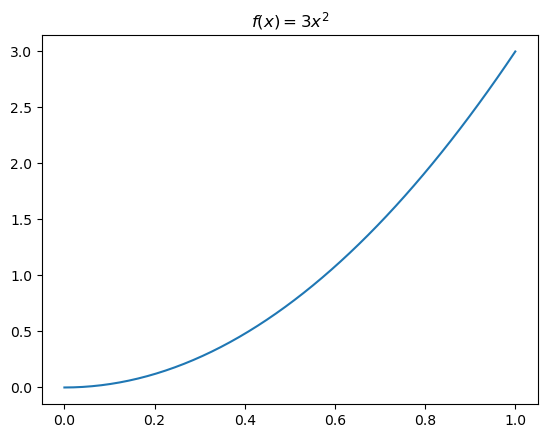

In [47]:
fig, ax = plt.subplots()

xdata = np.linspace(0, 1)
ydata = 3*xdata**2

sns.lineplot(x=xdata, y=ydata, ax=ax)
ax.set_title('$f(x)=3x^2$')

If we wanted to create a histogram that follows the shape of the given curve, we would have to follow the given steps in the inverse transform method.

Inverse Transform Method:
1. Compute for the integral of the function
2. Inverse the resulting function.
3. Get uniform random numbers from 0 to 1 and pass them through the inverse function.

In this example:

1. The computed integral would be:

<h2>$$F(x)=x^3+C$$</h2>

2. Inversing the function (removing the constant $C$) would convert to:

<h2>$$F^{-1}(x)=\sqrt[3]{x}$$</h2>

3. From the given inverse function, generate random numbers from 0-1 then use as input to the inverse function.

In [49]:
random_nums = np.random.uniform(size=50000)
random_nums[:10]

array([0.01314188, 0.82526757, 0.69975015, 0.01042062, 0.70483832,
       0.15103202, 0.96697291, 0.46440316, 0.43573935, 0.89120742])

In [51]:
y_transformed = np.cbrt(random_nums)  # Inverse function
y_transformed[:10]

array([0.23598577, 0.93799011, 0.88779835, 0.21842275, 0.889945  ,
       0.53254504, 0.9888675 , 0.77439948, 0.75812752, 0.96233496])

Getting the histogram of the transformed numbers would yield to:

Text(0.5, 1.0, 'Distribution of $f(x)=3x^2$')

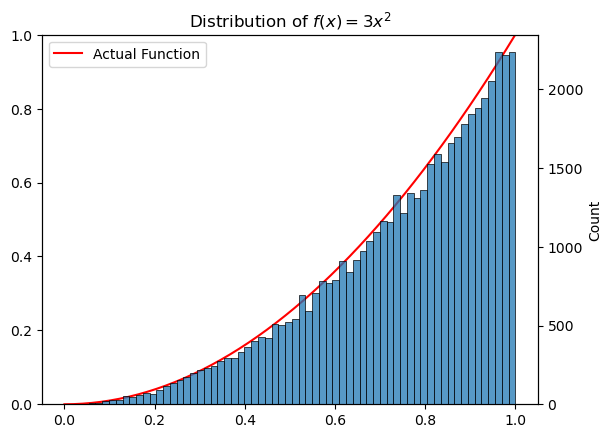

In [53]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

xdata = np.linspace(0, 1)
ydata = xdata**2

sns.lineplot(x=xdata, y=ydata, color='red', ax=ax, label='Actual Function')
ax.set_ylim(0,1)

sns.histplot(x=y_transformed, ax=ax2)

ax.set_title('Distribution of $f(x)=3x^2$')

---

<h3><center>END OF FILE</center></h3>

---

**The software is provided "as is", without warranty of any kind, express or implied, including but not limited to the warranties of merchantability, fitness for a particular purpose and noninfringement. in no event shall the authors or copyright holders be liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, arising from, out of or in connection with the software or the use or other dealings in the software.**